In [1]:
import numpy as np 
import matplotlib.pyplot as plt
#%matplotlib notebook 
plt.rcParams["figure.figsize"] = (6,6)
from mpl_toolkits.mplot3d import Axes3D

Simulation de systèmes hamiltoniens
==============================

Considérons un système hamiltonien d'état $x=(q,p)\in \mathbb{R}^d \times \mathbb{R}^d$, où $q$ et $p$ sont les positions généralisées et quantités de mouvement respectivement, de dynamique
\begin{align*}
\dot{q} &= f_q(p) \\
\dot{p} &= f_p(q)
\end{align*}
avec
\begin{align*}
f_q(p) &= \nabla_p H(q,p)  \\
f_p(q) &= - \nabla_q H(q,p) 
\end{align*}
où $H: \mathbb{R}^d \times \mathbb{R}^d\to \mathbb{R}$ est le hamiltonien du type
$$
H(q,p) = \frac{1}{2}p^\top M^{-1} p + U(q)
$$
avec $M\in \mathbb{R}^{d\times d}$ la matrice de masses (généralisées) et $U$ un potentiel qui varie selon les applications.

Des exemples typiques de systèmes hamiltoniens sont les systèmes à N corps en interation : planètes en interaction gravitationnelle, particules quantiques en interaction électrostatique, molécules en interaction (potentiel de Lennard-Jones), etc... Dans ce cas, $d$ est égale à $N$ fois la dimension $\rm dim$ des positions $q_k$ caractérisant chaque corps, avec
$$
q=(q_1,\ldots,q_k,\ldots, q_N) \in \mathbb{R}^{\rm dim} \times \cdots \times \mathbb{R}^{\rm dim}=\mathbb{R}^{d} \quad , \quad p=(p_1,\ldots,p_k,\ldots, p_N)\in \mathbb{R}^{\rm dim} \times \cdots \times \mathbb{R}^{\rm dim}=\mathbb{R}^{d}
$$
et donc
\begin{align*}
\dot{q}_k &= f_{q_k}(p) = \nabla_{p_k} H(q,p)  \\
\dot{p}_k &= f_{p_k}(q) = - \nabla_{q_k} H(q,p) 
\end{align*}
$M$ est typiquement diagonale contenant la masse de chaque corps, et $U$ est de la forme
$$
U(q) = \sum_{1\leq l < k\leq N} \varphi_{kl}(\|q_k-q_l\|)
$$
où $\varphi_{kl} : \mathbb{R} \to \mathbb{R}$ dépend de l'application.

**Question 1** Montrer qu'alors
$$
\dot{q}_k = f_{q_k}(p) = \frac{1}{m_k} p_k \qquad , \qquad  \dot{p}_k = f_{p_k}(q) = -\sum_{l \neq k} \varphi_{kl}'(\|q_k-q_l\|)\frac{q_k-q_l}{\|q_k-q_l\|}
$$

**Étude de $\dot{q}_k$:**
Notons tout d'abord que $H(q, p) = \frac{1}{2}.\langle p,M^{-1}p\rangle + \ U(q)$

On va alors calculer la différentielle par rapport à $p$ de $\nabla_{p_k}H(q, p)$. C'est la meme que celle de la fonction $g:p \rightarrow \frac{1}{2}.\langle p, M^{-1}p \rangle$.  

On a, $\forall h \in \mathbb{R}^d$ : 

$$
g(p+h) = \langle p+h,(M^{-1}.p + M^{-1}.h)\rangle = g(p) + \langle h, M^{-1}.p\rangle + \langle p, M^{-1}.h \rangle + o(h)
$$

Or par symétrie de $M$ et donc $M^{-1}$, on a $\langle p, M^{-1}.h \rangle = \langle h, (M^{-1})^\top \rangle = \langle h, M^{-1}.p \rangle$

Donc on peut écrire, $\forall q\in \mathbb{R}^d$

$$
dg(p) = d_p\nabla_{p_k}H(q, p) = \langle h, M^{-1}.p \rangle
$$

Et ainsi,
\begin{equation}
\boxed{\dot{q}_k = f_{q_k}(p) = \frac{1}{m_k} p_k}
\end{equation}


**Étude de $\dot{p}_k$:** Soit $(k,l) \in [1, N]^2$ avec $k$ différent de $l$

Notons avant tout, $U_{l,k}(q) = \varphi(||q_k - q_l||)$

Pour le calcul de $\nabla_{q_k} H(q,p) = \nabla_{q_k} U(q)$, on écrit alors, par dérivation classique d'une composée de fonction à valeurs réelles, pour chaque coordonée $q_{k_i}$ de $q_k$: 
$$
\frac{\partial U_{l,k}}{\partial q_{k_i}}(q) = \varphi'(||q_k - q_l||).\frac{2.(q_{k_i}-q_{l_i})}{2.\|q_k-q_l\|} 
$$

(on exploite le fait que $\|q_k-q_l\| = \sqrt{\sum_i (q_{k_i} - q_{l_i})^2}$ )

Et donc, on obtient que $\nabla_{q_k} U_{l,k}(q) = \phi'(||q_k - q_l||).\frac{(q_k-q_l)}{\|q_k-q_l\|}$

D'ou finalement, en ne gardant que les termes ou $q_k$ intervient dans la formule de $U(q)$ : 
\begin{equation}
\boxed{\nabla_{q_k} U(q) = \nabla_{q_k}  (\sum_{l \neq k} U_{l,k})(q) = \sum_{l \neq k} \varphi'(\|q_k-q_l\|)\frac{q_k-q_l}{\|q_k-q_l\|}}
\end{equation}

Et on a le résultat demandé.


Vérifier par le calcul que $H$ est conservée le long des trajectoires.

**Réponse :**
On étudie $H$ le long des trajectoires via une évolution temporelle quelconque de $H(p(t), q(t))$.
On commence par écrire classiquement :

$$
\frac{\partial H}{\partial t}(p,q) = \sum_{k \in [1,N]} (\nabla_{p_k}H.\frac{dp_k}{dt} + \nabla_{q_k}H.\frac{dq_k}{dt})
$$

Or on sait que :
\begin{align*}
\dot{q}_k &= f_{q_k}(p) = \nabla_{p_k} H(q,p)  \\
\dot{p}_k &= f_{p_k}(q) = - \nabla_{q_k} H(q,p) 
\end{align*}

D'ou finalement : 
\begin{equation}
\boxed{\frac{\partial H}{\partial t}(p(t),q(t)) = 0}
\end{equation}

Donc $H$ est conservé au cours du temps, et donc le long des trajectoires.


**Question 2**
On propose de simuler plusieurs planètes en interaction gravitationnelle. Choisir un des deux scénarios suivants :
- mouvement planaire de deux planètes dans $\mathbb{R}^2$ (problème de Kepler à deux corps)
- système solaire à $N$ planètes dans $\mathbb{R}^3$.

et définir les fonctions $U$, $H$, $f_q$, $f_p$ et $f=(f_q,f_p)$ correspondantes. Nous vous donnons ci-dessous les paramètres à utiliser pour la simulation dans chacun des deux scénarios.


*Remarque :* On peut choisir le scénario. Pour le problème à 2 corps, mettre exemple=1. Pour le problème à N corps, mettre exemple=2

In [2]:
exemple=2

if exemple==1:
    dt=0.0001
    # EXAMPLE 1 : KEPLER PROBLEM (here written for 2 planets but can also be written in relative coordinates with respect to one planet)
    N = 2  # number of bodies
    dim = 2 # dimension of position of each body
    d = N*dim
    m_list = [100,1]  # list of masses (normalized)
    G = 1
    #parameters for simulation
    e = 0.7
    t0, tf = 0.0, 1.0  # with time step dt < 0.001
    dt = 0.0001
    q0 = [0,0,1-e,0]
    p0 = [0,0,0,np.sqrt(m_list[0])*np.sqrt((1+e)/(1-e))]
    x0 = np.concatenate([q0,p0])
    syst_sol = ['planet 1 ($m_1 = 100 m_2$)', 'planet 2 ($m_2$)']   
elif exemple==2:
    # EXAMPLE 2 : SOLAR SYSTEM
    N = 4  # number of bodies 
    # if you want to add other planets please use the parameters in the table below extracted from 
    # [Ernst Hairer, Christian Lubich, Gerhard Wanner, Geometric Numerical Integration Structure-Preserving Algorithms for Ordinary Differential Equations
    dim = 3 # dimension of position of each body
    d = N*dim

    G = 2.95912208286*10**(-4); # normalized gravity constant

    m_list = [1.00000597682,0.000954786104043,0.000285583733151,0.0000437273164546]  # N masses : sun+close planets, jupiter, saturn, uranus (ratio relative to sun)
    t0, tf = 0.0, 40000   # in earth days   # with time step dt > 1
    dt = 4
    q0 = [0,0,0,-3.5023653,-3.8169847,-1.5507963,9.0755314,-3.0458353,-1.6483708,8.3101420,-16.2901086,-7.2521278]
    p0 = [0,0,0,m_list[1]*0.00565429,-m_list[1]*0.00412490,-m_list[1]*0.00190589,m_list[2]*0.00168318,m_list[2]*0.00483525,m_list[2]*0.00192462,m_list[3]*0.00354178,m_list[3]*0.00137102,m_list[3]*0.00055029]
    x0 = np.concatenate([q0,p0])
    syst_sol = ['sun + close planets', 'jupiter', 'saturn', 'uranus']

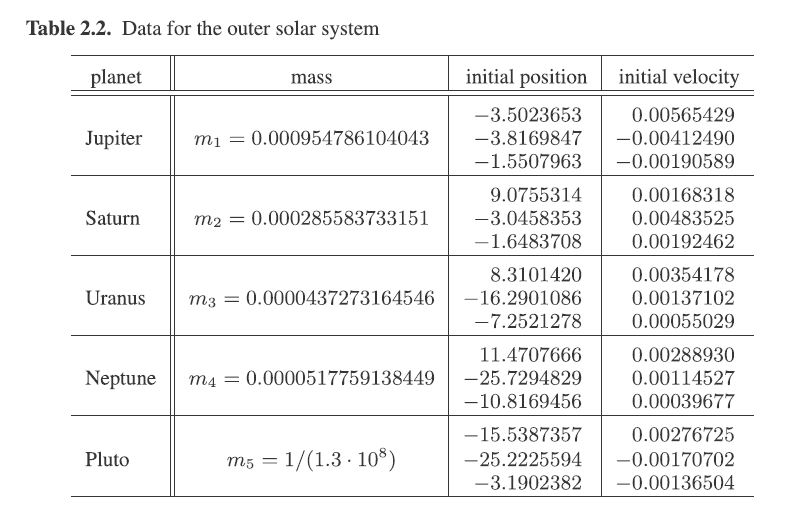

In [3]:
# structure : x = (q, p) = (q1,q2,...,qN, p1,p2,...,pN)
M = np.kron(np.diag(m_list), np.eye(dim))   # matrix M of dimension d containing the masses
M_inv = np.linalg.inv(M)


def norme(q,l): #Même longueur les deux, des tableaux numpy
    q = np.array(q)
    l = np.array(l)
    dist = np.sqrt(np.sum((q-l)**2))
    return(dist)

def U(q):  # q = (q1,q2,...,qN)
    u = 0
    for k in range(N):
        qk = q[dim*k:dim*(k+1)]
        for l in range(k):
            ql = q[dim*l:dim*(l+1)]
            u -= G*M[l*dim,l*dim]*M[k*dim,k*dim]/norme(qk,ql) #Attention pour la matrice M les valeurs se répètent dim fois car
            #la matrice est de dimension d !
    return u

def H(x):    # x = (q, p) = (q1,q2,...,qN, p1,p2,...,pN)
    q = x[0:N*dim]
    p = x[N*dim:]
    return 1/2*((p.transpose().dot(M_inv)).dot(p))+U(q)

def fq(p):   
    return np.dot(M_inv,p)
  

def fp(q):  # q = (q1,q2,...,qN) #Moi je les ai numérotés de 0 à N-1
    final=np.zeros((dim*N,))
    for k in range(N):
        point_pk = np.zeros((dim,))
        qk = q[dim*k:dim*(k+1)]
        for l in range(N):
            if l!=k:
                ql = q[dim*l:dim*(l+1)]                
                point_pk -= (qk-ql)/(norme(qk,ql))**3*G*M[k*dim,k*dim]*M[l*dim,l*dim]
    
        final[dim*k:dim*(k+1)] = point_pk
    return final


def f(x):
    q = x[:N*dim]
    p = x[N*dim:]
    return np.concatenate([fq(p),fp(q)])

if exemple==1:
    # TEST example 1
    print(fp(np.array([0,0,2,3])))
    print(f(np.array([0,0,2,3,0,0,0,0])))
    print(f(x0))
elif exemple==2:
    # TEST example 2
    print(fp(np.array([0,0,0,2,3,4,-1,3,4,-1,3,6])))
    print(fq(np.array([0,0,0,2,3,4,-1,3,4,-1,3,6])))
    print(f(np.array([0,0,0,2,3,0,-1,3,5,-1,3,10,0,0,0,0,0,0,0,0,0,0,0,0])))

[ 2.93938599e-09  7.46419184e-09  1.00352049e-08 -3.62805589e-09
 -5.42744994e-09 -7.23607276e-09  6.46404628e-10 -1.91231829e-09
 -2.54883389e-09  4.22652676e-11 -1.24423614e-10 -2.50298205e-10]
[     0.              0.              0.           2094.71
   3142.065        4189.42        -3501.59999999  10504.79999998
  14006.39999998 -22868.99999999  68606.99999998 137213.99999997]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.16361921e-08  1.93413372e-08  2.15280004e-09 -1.20567899e-08
 -1.80833045e-08  2.14351458e-12  4.09349429e-10 -1.22438537e-09
 -2.04252943e-09  1.12483436e-11 -3.36473241e-11 -1.12414122e-10]


Euler explicite
================

**Question 3** Compléter la fonction ci-dessous prenant en entrée une fonction $f: \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(x)$. La tester sur une équation différentielle simple aux solutions exactes connues.

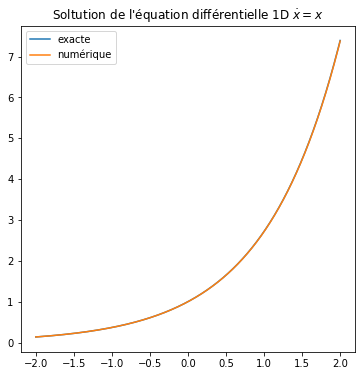

In [4]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    T_exp, X_exp = [t0], [x0] #C'est une liste avec des listes/tableaux numpy dedans pour xs
    while T_exp[-1] < tf:
        X_exp.append(X_exp[-1] + dt*f(X_exp[-1]))
        T_exp.append(T_exp[-1] + dt)
    return (np.array(T_exp), np.array(X_exp).transpose()) #On transpose pour mettre en colonne chaque instant.


def identité(x):
    return(x)
#Test en dimension 1 (se généralise facilement en dimension quelconque)
T1, X1 = solve_euler_explicit(identité, np.exp(-2), 0.001, -2, 2)
plt.plot(T1, np.exp(T1),label="exacte")
plt.plot(T1, X1,label="numérique")
plt.legend()
plt.title("Soltution de l'équation différentielle 1D $\dot{x}=x$")
plt.show()

La solution numérique et la solution exacte se supperposent de manière satisfaisante

**Question 4** Utiliser le schéma d'Euler pour simuler les trajectoires des planètes. Visualiser l'évolution des positions $t\mapsto q(t)$ et du hamiltonien $H$. Ce schéma numérique vous semble-t-il adapté ? Que se passe-t-il lorsque $\Delta t$ tend vers 0 pour un horizon de temps $t_f$ donné ? Et à $\Delta t$ fixé, lorsque $t_f$ augmente ? Commenter.

In [5]:
def evol_q_and_H(euler, args, legend, ref="astre"):
    """Visualiser l'évolution des positions q(t) simulée par la fonction euler, 
    à laquelle ont été affectés les arguments fournis (args).
    legend est une liste contenant (dans l'ordre) le nom des objets modélisés.
    L'argument ref correspond au référentiel du centre de l'astre le plus lourd
    s'il vaut "astre", sinon c'est qu'on est dans le référentiel d'origine"""
    T, X = euler(*args)
    qt = X[:d,:]
    pt = X[d:,:]
    
    Ht = []
    for k, t in enumerate(T):
        Ht.append(H(np.concatenate([qt[:, k],pt[:, k]])))   

    #Tracé 3D des trajectoires
    plt.close()
    
    plt.figure(1)
    ax= plt.axes(projection='3d')
    if ref=="astre":
        x1,x2,x3=qt[0],qt[1],qt[2]
    else:
        x1,x2,x3=0,0,0
    if dim == 2: 
        for k in range (N):
            plt.plot(qt[dim*k]-x1, qt[dim*k+1]-x2, label=legend[k])
    else:
        for k in range (N):
            plt.plot(qt[dim*k]-x1, qt[dim*k+1]-x2, qt[dim*k+2]-x3, label=legend[k])
    plt.legend()
    plt.title(f"Evolution des positions $t\mapsto q(t)$ (unités normalisées au problème) \n méthode utilisée : {euler}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.tight_layout()
    plt.legend()
    
    plt.figure(2)
    plt.plot(T, Ht)
    plt.xlabel('$t$ (unité dépend du problème)')
    plt.ylabel('$H(t)$ (unité normalisée)')
    plt.title('Tracé de $t\mapsto H(t)$ avec cette méthode', pad = 20)
    

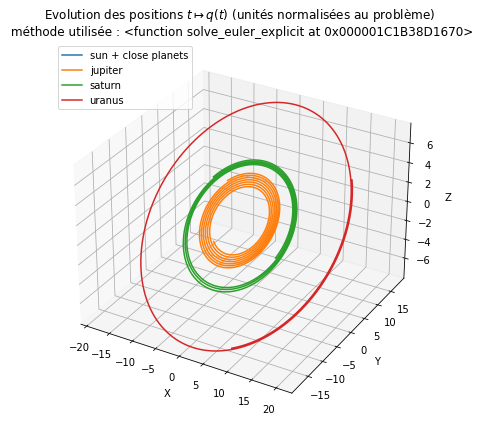

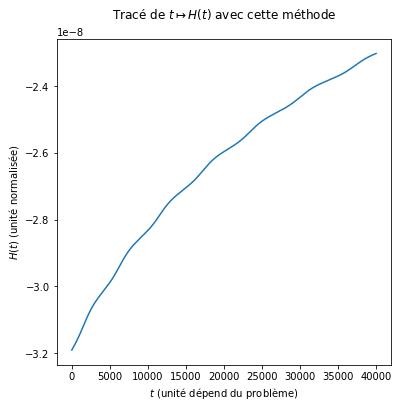

In [6]:
evol_q_and_H(solve_euler_explicit, args = [f, x0, dt, t0, tf], legend = syst_sol, ref="astre")

Pour l'exemple "SOLAR SYSTEM", sur une durée de $t=4.10^4$ jours terrestres (soit presque $100$ ans) on a : $\frac{\Delta H_{max}}{H_{moy}} \approx 0.3$. Or on attendait une fonction $H$ constante du temps. Ce schéma numérique (euler_explicit) semble donc peu adapté au problème étudié.

Quand $\Delta t \rightarrow 0$ pour $t_f$ fixé, le temps d'excution du programme augmente considérablement. Mais il est à noter que la précision de la résolution en devient plus satisfaisante (on s'approche de la réalité avec un temps qui tend vers la continuité et non plus la discrétisation).

Quand $t_f$ augmente avec $\Delta t$ fixé, c'est la meme chose, sauf qu'on ne gagne pas en précision de résolution. Ces deux derniers points s'expliquent par le fait que la fonction euler_explicit a une complexité en $\mathcal{O}(\frac{t_f}{\Delta t})$.

Euler symplectique
==============

On cherche maintenant un schéma plus adapté. Pour cela, nous allons chercher un schéma, dit *symplectique*.

 
Notons d'abord qu'en définissant la matrice par blocs
$$
S = \left(
\begin{matrix}
0 & I_d \\
-I_d & 0
\end{matrix}
\right) \in \mathbb{R}^{2d\times 2d}
$$
la dynamique se réécrit
$$
\dot{x} = 
\left(
\begin{matrix}
f_q(p)\\
f_p(q)
\end{matrix}
\right)
= f(x) = S \ \nabla H(x) \ .
$$

**Question 4** Pour $d=1$, $x_a=(q_a,p_a)\in \mathbb{R}^2$ et $x_b=(q_b,p_b)\in \mathbb{R}^2$, justifier que $x_a^\top S x_b$ représente l'aire orientée du parallélogramme généré par $x_a$ et $x_b$.

On étend cette définition au cas $d>1$, où $x_a^\top S x_b$ avec $x_a,x_b\in \mathbb{R}^{2d}$ représente alors la somme des aires orientées des projections orthogonales sur chaque plan $(q_i,p_i)$ du parallélogrammes généré dans $\mathbb{R}^{2d}$ par $x_a,x_b$. Une transformation $C^1$ $\phi : \mathbb{R}^{2d}\to \mathbb{R}^{2d}$ est alors dite *symplectique*  si sa matrice jacobienne conserve l'aire, c'est-à-dire si
$$
J_\phi(x)^\top S J_\phi(x) = S \qquad \forall x \in \mathbb{R}^{2d}
$$



**Réponse :**
Le cas $d=1$ correspond au cas où l'on a qu'une seule planète qui se déplace sur un axe à 1 dimension. L'espace des phases est donc un plan $(p,q)$. On sait que pour deux vecteurs $\vec u$ et $\vec v$ de $\mathbb{R}^2$, l'aire orienté (algébrique) du parallélogramme engendré est donné par $det(\vec{u}, \vec{v})$.

Or, si on assimile $\mathbb{R}^2$ avec $M_{2,1}(\mathbb{R})$, on obtient: $$x_a^{\top} S x_b = \begin{pmatrix} q_a & p_a \end{pmatrix} \begin{pmatrix} 0 & 1 \\ -1&0 \end{pmatrix} \begin{pmatrix} q_b \\ p_b \end{pmatrix}=q_ap_b-p_aq_b= det(x_a, x_b) $$
Et on a donc la justification attendue.

**Question 5 (Bonus)** Pour $t\in \mathbb{R}$, on définit le flot $\varphi_t : \mathbb{R}^{2d}\to \mathbb{R}^{2d}$ tel que $\varphi_t(x_0)$ donne la valeur au temps $t$ de la solution initialisée en $x_0$ à $t=0$. Montrer que pour un système hamiltonien, le flot est symplectique (Poincaré 1899). *Indice : montrer que $\frac{d}{dt} J_{\varphi_t}(x_a)^\top S J_{\varphi_t}(x_b)=0$.*

En d'autres termes, si l'on suit comment se déforme au cours du temps un ensemble de conditions initiales, on verra que l'ensemble se déforme mais conserve son aire. Le problème c'est que les schémas numériques usuels (dont les schémas d'Euler implicite et explicite) ne garantissent pas cette conservation. 

Considérons plutôt les schémas suivants, appelés *Euler Symplectiques*, qui ''mélangent'' les schémas d'Euler implicites et explicites :
$$
(A)
\left\{
\begin{array}{rcl}
q^{j+1} &=& q^{j} + \Delta t \, f_q(p^{j}) \\
p^{j+1} &=& p^{j} + \Delta t \, f_p(q^{j+1})
\end{array}
\right.
\qquad \text{ou} \qquad
(B)
\left\{
\begin{array}{rcl}
q^{j+1} &=& q^{j} + \Delta t \, f_q(p^{j+1}) \\
p^{j+1} &=& p^{j} + \Delta t \, f_p(q^{j})
\end{array}
\right.
$$

**Question 6** Justifier que ces schémas sont toujours consistant d'ordre 1. Réécrire un de ces schémas sous la forme $x^{j+1}=\Phi(x^j)$, pour $x^j=(q^j,p^j)$ et vérifier que $\Phi$ est symplectique à l'ordre 1 (en $\Delta t$). 

**Réponse :**
On peut réecrire le schéma (A) sous la forme : $$\left\{
\begin{array}{rcl}
q^{j+1} &=& q^{j} + \Delta t \, f_q(p^{j}) \\
p^{j+1}& =& p^j + \Delta t f_p(q^j+\Delta t f_q(p^j)) 
\end{array}
\right.$$
Et donc en notant $x^j=(q^j,p^j) = (x^{j}_1, x^{j}_2$), on a :$$ x^{j+1} = \left( x^{j}_1 + \Delta t \ f_q(x^{j}_2), \ x^j_2 + \Delta t f_p \left[ x^j_1+\Delta t f_q(x^j_2)\right] \right)$$

En posant:
$$\begin{array}{ccccc}
\Phi & : & \mathbb{R}\times \mathbb{R}^{2d} \times\mathbb{R} & \to &\mathbb{R}^{2d}  \\
 & & (t,x,\Delta t) & \mapsto & \left( f_q(x_2) , f_p(x_1+\Delta t f_q(x_2)) \right) \\
\end{array}$$
On peut écrire:
$$x^{j+1}=x^j+\Delta t. \Phi (t^j,x^j,\Delta t)$$
et, après calculs, on obtient :$$\frac{\partial \Phi}{\partial \Delta t}(t,x,\Delta t)=(0, \ J_{f_p}(x_1+\Delta t f_q(x_2) ). f_q(x_2)) $$
Par la formule de la chaîne, avec $f$ qui ne dépendant pas explicitement de $t$: $$ f^{[1]}(t,x)= 0 + J_f(x). \dot{x}(t) = J_f(x). f(x)$$
On a bien : $$\left\{ \begin{array}{rcl} \Phi(t,x,0) &=& (f_q(x_2), \ f_p(x_1) )=f(t,x) \\ 
\frac{\partial \Phi}{\partial \Delta t}(t,x,0) &=& (0, \ J_{f_p}(x_1). f_q(x_2) ) \neq f^{[1]}(t,x)=( J_{f_q}(x_2). f_p(x_1), \ J_{f_p}(x_1). f_q(x_2) )
\end{array} \right.$$

Le schéma A est donc bien consistant d'ordre exactement 1. Les calculs sont quasiment les mêmes pour le schéma B, on obtient que lui aussi est consistant d'ordre exactement 1.

**Symplectique :**
On peut écrire, pour le schéma (A) : $$ x^{j+1} = \left( x^{j}_1 + \Delta t \ f_q(x^{j}_2), \ x^j_2 + \Delta t f_p \left[ x^j_1+\Delta t f_q(x^j_2)\right] \right)$$
d'où $x^{j+1}=\Phi (x^j)$ en posant une nouvelle fonction $\Phi$ définie par : 
$$\begin{array}{ccccc}
\Phi & : & \mathbb{R}^{2d}& \to &\mathbb{R}^{2d}  \\
 & & x & \mapsto & \left( x_1 + f_q(x_2) , x_2 + f_p(x_1+\Delta t f_q(x_2)) \right) \\
\end{array} $$
On remarque qu'en appliquant la règle de la chaîne et en faisant attention aux indices des variables par rapport à lesquelles on dérive dans les dérivées partielles que :
$$J_{\Phi}(x) = \begin{pmatrix} I_d & \Delta t J_{f_q}(x) \\ \Delta t J_{f_p}(x) & I_d + \Delta t^2 \times M \end{pmatrix} = \begin{pmatrix} A&B \\ C&D  \end{pmatrix}$$
La matrice $M$ n'a que peu d'importance, puisque l'on regarde uniquement à l'ordre 1 en $\Delta t$, ce qui signifie que l'on néglige les contributions en $\Delta t^2$.
Cela donne : $$ J_\phi(x)^\top S J_\phi(x) = \begin{pmatrix} C-C^\top & I_d - C^\top B \\ B^\top C - I_d & B^\top - B \end{pmatrix} $$
Or, $  B^\top C $ et $C^\top B$ sont des contributions d'ordre 2, donc négligeables. Finalement :
$$ J_\phi(x)^\top S J_\phi(x) = \begin{pmatrix} C-C^\top & I_d \\ - I_d & B^\top - B \end{pmatrix} $$
Or, on sait que $f_{q_k}(p) = \frac{1}{m_k} p_k$ d'après Q1. On obtient donc que B est diagonale donc notamment symétrique.
Cependant, pour la jacobienne de $f_p$, Nous n'avons pas réussi à montrer qu'elle était potentiellement symétrique avec l'expression de la Q1. Si l'on suppose cela vrai, on obtient bien :
$$J_\phi(x)^\top S J_\phi(x)=S $$ à l'ordre 1 en $\Delta t$

**Question 7** Coder ce schéma et le tester sur le système hamiltonien. Comment évolue $H$ maintenant ? Comparer aux conclusions tirées pour le schéma d'Euler explicite.

In [7]:
def solve_euler_symplectic(fq, fp, x0, dt, t0, tf):
    T_symp, X_symp = [t0], [x0]
    while T_symp[-1] < tf:
        qj = X_symp[-1][0:d] #d=N*dim
        pj = X_symp[-1][d:]
        qjsuite = qj + dt*fq(pj)
        pjsuite = pj + dt*fp(qjsuite)

        X_symp.append(np.concatenate((qjsuite,pjsuite)))
        T_symp.append(T_symp[-1]+dt)
    return (np.array(T_symp), np.array(X_symp).T)

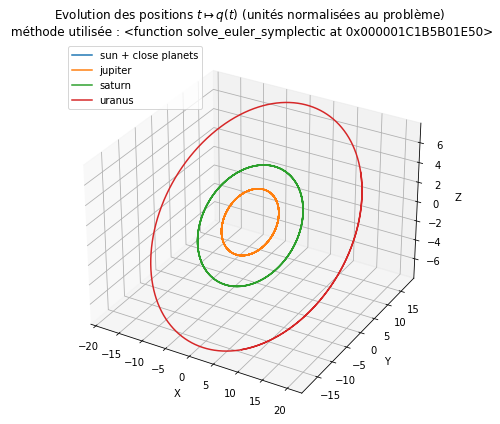

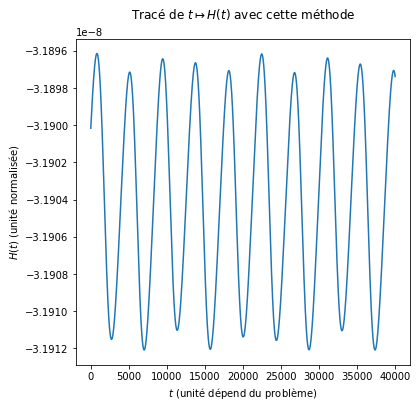

In [8]:
evol_q_and_H(solve_euler_symplectic, [fq, fp, x0, dt, t0, tf], syst_sol,ref="astre")

On lit ici $\frac{\Delta H_{max}}{H_{moy}} \approx 5.10^{-4}$ (pour l'exemple à N corps) soit des variations de $H$ tout a fait négligeable, contrairement à celles simulées par la méthode explicite. Cette méthode symplectique est donc bien mieux adaptée au problème "SOLAR SYSTEM"

**Question 8 (BONUS)** On considère enfin la célèbre méthode de Störmer-Verlet
\begin{align*}
p^{j+1/2} &= p^{j} + \frac{\Delta t}{2} \, f_p(q^{j})\\
q^{j+1} &= q^{j} + \Delta t \,  f_q(p^{j+1/2}) \\
p^{j+1} &= p^{j+1/2} + \frac{\Delta t}{2} \, f_p(q^{j+1})
\end{align*}
construite à partir de la composition des deux schémas d'Euler symplectiques (A) et (B) ci-dessus. Justifier qu'elle est toujours symplectique mais qu'elle est maintenant d'ordre 2. Appliquer cette méthode au système hamiltonien et comparer les performances.

In [9]:
def solve_euler_symplectic_SV(fq,fp, x0, dt, t0, tf):
    T_SV, X_SV = [t0], [x0]
    while T_SV[-1] < tf:
        qj = X_SV[-1][0:d] #d=N*dim
        pj = X_SV[-1][d:]
        pjmoit = pj + dt*fp(qj)/2
        qjsuite = qj + dt*fq(pjmoit)
        pjsuite = pjmoit + dt*fp(qjsuite)/2
        X_SV.append(np.concatenate((qjsuite,pjsuite)))
        T_SV.append(T_SV[-1] + dt)
        
    return (np.array(T_SV), np.array(X_SV).T)

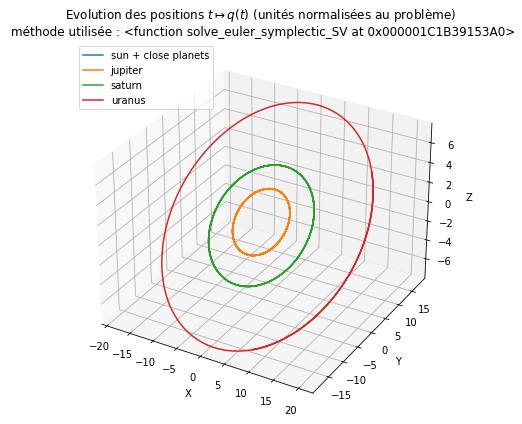

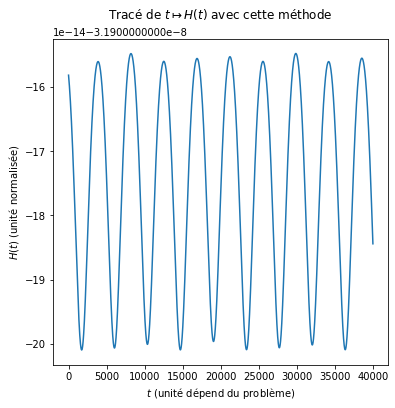

In [10]:
evol_q_and_H(solve_euler_symplectic_SV, [fq, fp, x0, dt, t0, tf], syst_sol)

Avec cette nouvelle méthode, $\frac{\Delta H_{max}}{H_{moy}} \approx 1.10^{-6}$ (pour l'exemple à N corps), elle est donc encore plus satisfaisante que la précédente, pour des temps d'exécution du meme ordre de grandeur. Elle sera donc à privilégier pour le problème étudié.